Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1859
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0281 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 6.1912e-04  
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9039e-04 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 135us/step - loss: 3.9857e-04
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5223e-04 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0366e-04 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2920e-05 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4517e-05 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7515e-05 
Ep

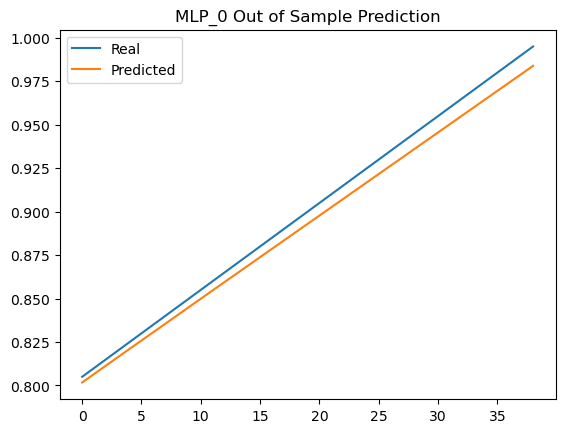

R2 =  0.9808226371150315
MAE =  0.0070742056919978384
MSE =  5.570392612233324e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


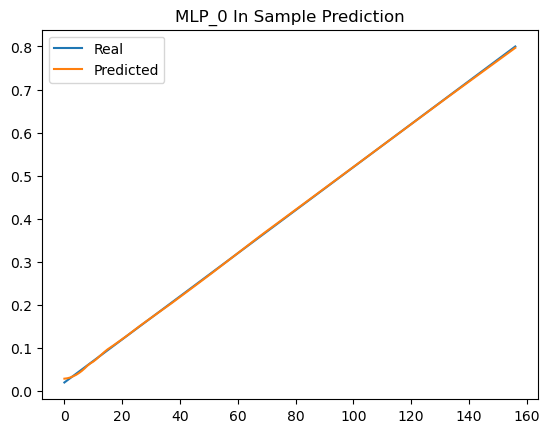

In [73]:
# Task 3.1.1.
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Input
from keras.models import Sequential, load_model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#define an MLP model to be trained
def create_MLP(input_train, output_train, window_size, num_layers = 1, epochs = 1):

    num_neurons = 64
    activator_function = 'relu'

    # Create MLP model
    model = Sequential()
    model.add(Input((window_size,)))    # Input layer
    
    # Create hidden layers
    for i in range(num_layers):
        model.add(Dense(num_neurons, activation=activator_function))    #   Hidden Layers

    model.add(Dense(1))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


def split_data(series, input_window, output_window, training_percent):

    input_seq = []
    output_seq = []

    # Separate series into input and output series based onrequired steps
    for i in range(len(series) - input_window - output_window + 1):
        input_seq.append(series[i:i + input_window])
        output_seq.append(series[i + input_window:i + input_window + output_window])

    input_seq = np.array(input_seq)
    output_seq = np.array(output_seq)

    # Split data into 80% for training, 20% for predication
    split_index = round(len(input_seq)*training_percent)
    # training data
    input_train = input_seq[:split_index]
    output_train = output_seq[:split_index]
    # testing data
    input_predict = input_seq[split_index:]
    output_predict = output_seq[split_index:]

    return [input_train, output_train], [input_predict, output_predict]

# Task 3.1.1.1
# Creat an array of 200 steps from 0 to 1
num_points = 200
# Create the equal-difference series
series = np.linspace(0, 1, num_points, endpoint=False)

# Split data as required
train_series, test_series = split_data(series, 4, 1, 0.8)

# Create MLP
MLP_0 = create_MLP(train_series[0], train_series[1], 4, 10, 20)

# Predict out of sample values
MLP_0_Output_Predict = MLP_0.predict(test_series[0])

plt.figure()
plt.title("MLP_0 Out of Sample Prediction")
plt.savefig('plots/MLP_0_OutSample.png')
plt.plot(test_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(MLP_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_0_Output_Predict, test_series[1]))

# Predict in sample values
MLP_0_Output_Predict = MLP_0.predict(train_series[0])

plt.figure()
plt.title("MLP_0 In Sample Prediction")
plt.savefig('plots/MLP_0_InSample.png')
plt.plot(train_series[1],label='Real')
plt.plot(MLP_0_Output_Predict, label='Predicted')
plt.legend()
plt.show()




Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2025
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1061 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0283 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3924e-04 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4005e-04 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5444e-04 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7415e-04 
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8685e-04 
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1982e-04 
Epoch 16/20

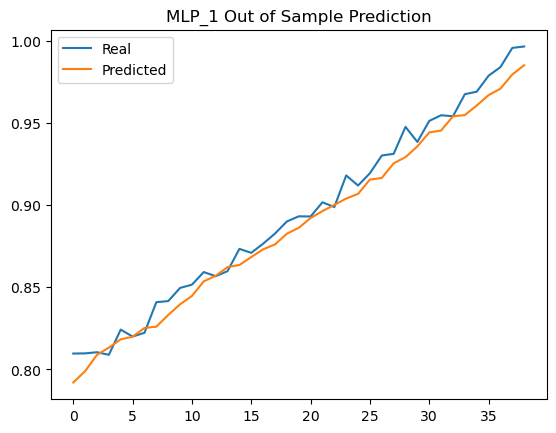

R2 =  0.9731501778923249
MAE =  0.007436599638761697
MSE =  8.063101323884795e-05
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


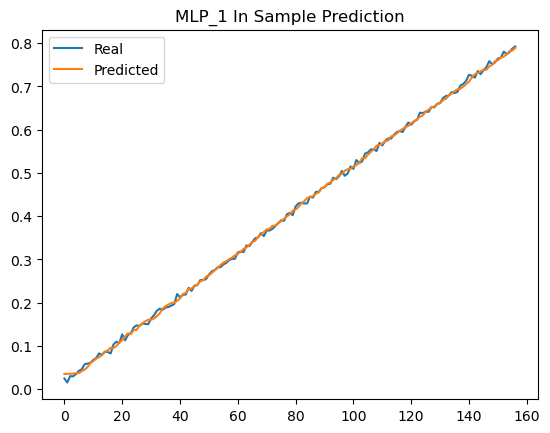

In [58]:
# Task 3.1.1.2
# Creat an array of 200 steps from 0 to 1 with noise
np.random.seed(0)  # for reproducibility
noise = np.random.normal(-0.5, 0.5, num_points)  # random noise
series_noise = series + 0.01*noise

# Split data as required
train_series, test_series = split_data(series_noise, 4, 1, 0.8)

# Create MLP
MLP_1 = create_MLP(train_series[0], train_series[1], 4, 15, 20)

# Predict out of sample values
MLP_1_Output_Predict = MLP_1.predict(test_series[0])

plt.figure()
plt.title("MLP_1 Out of Sample Prediction")
plt.savefig('plots/MLP_1_OutSample.png')
plt.plot(test_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(MLP_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_1_Output_Predict, test_series[1]))

# Predict in sample values
MLP_1_Output_Predict = MLP_1.predict(train_series[0])

plt.figure()
plt.title("MLP_1 In Sample Prediction")
plt.savefig('plots/MLP_1_InSample.png')
plt.plot(train_series[1],label='Real')
plt.plot(MLP_1_Output_Predict, label='Predicted')
plt.legend()
plt.show()

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0413
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


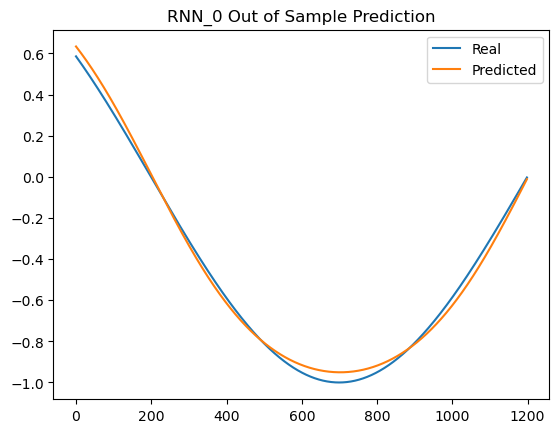

R2 =  0.994069741172456
MAE =  0.031193001569819963
MSE =  0.0012382708281930628
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


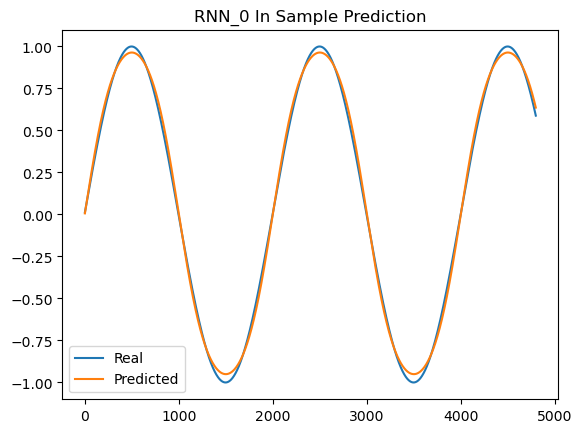

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1402
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


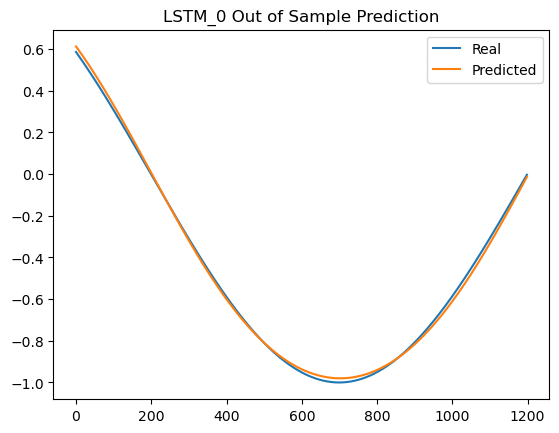

R2 =  0.9985482229694916
MAE =  0.015053859989355215
MSE =  0.0003033536611807457
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


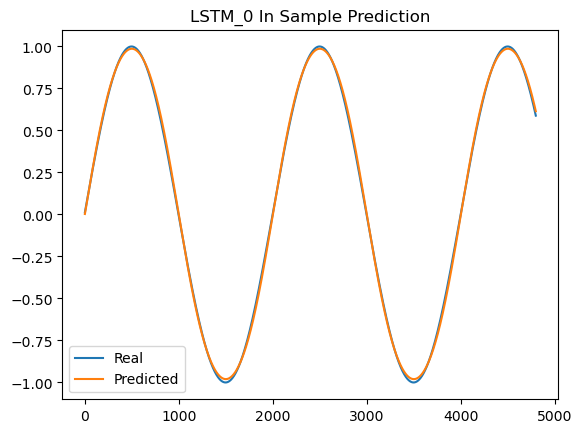

In [51]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM


def generate_sine_wave(freq, amplitude, duration, sampling_rate, noise_level):
    """
    Generate a sine wave.

    Parameters:
        freq (float): Frequency of the sine wave in Hz.
        amplitude (float): Amplitude of the sine wave.
        duration (float): Duration of the sine wave in seconds.
        sampling_rate (int): Sampling rate (number of samples per second).

    Returns:
        numpy.ndarray: The generated sine wave.
    """
    num_samples = int(duration * sampling_rate)
    time = np.linspace(0, duration, num_samples)
    noise = np.random.uniform(-noise_level, noise_level, num_samples)
    sine_wave = amplitude * np.sin(2 * np.pi * freq * time) + noise
    return [sine_wave,time]


#define an RNN model to be trained
def create_RNN(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create RNN model
    model = Sequential()
    model.add(SimpleRNN(num_neurons,input_shape=(window_size_in,1)))    # Input layer

    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model


#define an LSTM model to be trained
def create_LSTM(input_train, output_train, window_size_in, window_size_out, epochs = 1):

    num_neurons = 64

    # Create LSTM model
    model = Sequential()
    model.add(LSTM(num_neurons,input_shape=(window_size_in,1)))    # Input layer

    model.add(Dense(window_size_out))  # Output layer, no activation for regression

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(input_train, output_train, epochs=epochs, batch_size=32)

#    model.summary()
    return model

# Task 3.1.1.2
# Sine wave Parameters
frequency = 1/20  # Hz
amplitude = 1.0
duration = 60.0  # seconds
sampling_rate = 100  # Hz

# Generate sine wave
[sine_wave, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, 0)

# Split data as required
train_series, test_series = split_data(sine_wave, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_0 = create_RNN(train_series[0], train_series[1], 4, 2)

# Predict out of sample values
RNN_0_Output_Predict = RNN_0.predict(test_series[0])

plt.figure()
plt.savefig('plots/RNN_0_OutSample.png')
plt.title("RNN_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(RNN_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_0_Output_Predict, test_series[1]))

# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/RNN_0_InSample.png')
plt.title("RNN_0 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

# Create LSTM
LSTM_0 = create_LSTM(train_series[0], train_series[1], 4, 2, )

# Predict out of sample values
LSTM_0_Output_Predict = LSTM_0.predict(test_series[0])

plt.figure()
plt.savefig('plots/LSTM_0_OutSample.png')
plt.title("LSTM_0 Out of Sample Prediction")
plt.plot(test_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(LSTM_0_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_0_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_0_Output_Predict, test_series[1]))

# Predict in sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/LSTM_0_InSample.png')
plt.title("LSTM_0 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()


Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1818
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1005
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1047
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1027
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1016
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1024
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1032
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1020
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1011
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


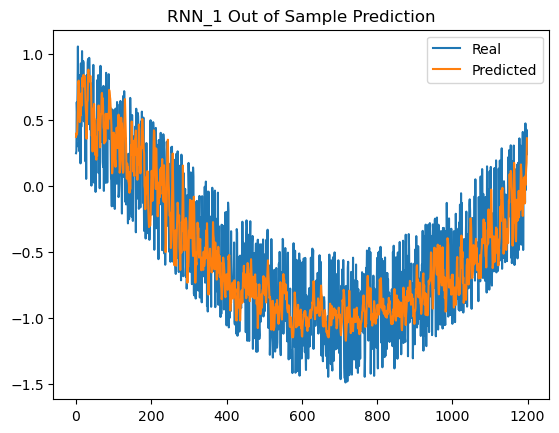

R2 =  0.5464200212480559
MAE =  0.2700239514930787
MSE =  0.10468707554073835
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


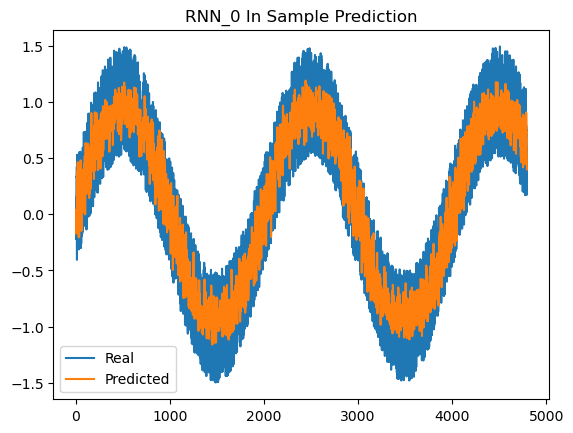

Epoch 1/10


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2632
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1040
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1044
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1026
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1021
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1029
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0990
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1030
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


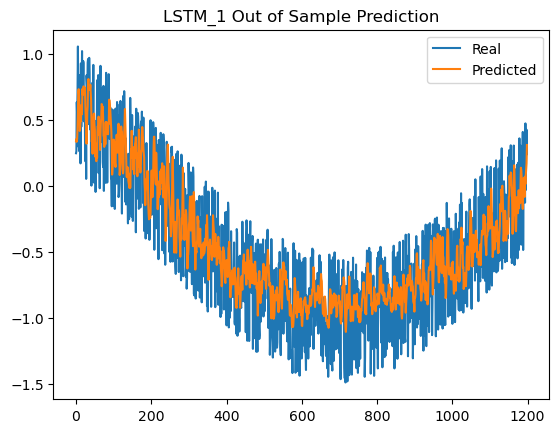

R2 =  0.5133571211399011
MAE =  0.2680789737556935
MSE =  0.10241038496704728
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


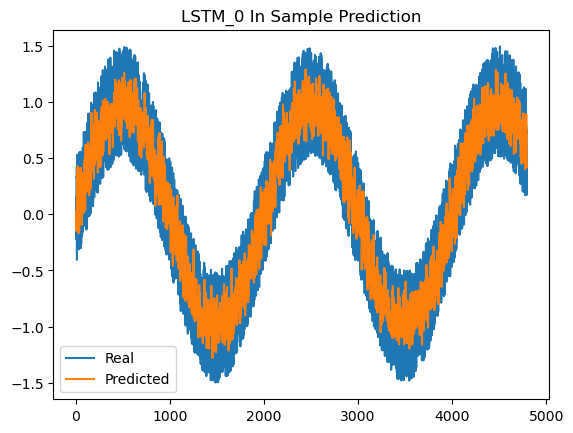

In [60]:

noise_level = 0.5   # noise

# Generate noisy sine wave
[sine_wave_noise, time] = generate_sine_wave(frequency, amplitude, duration, sampling_rate, noise_level)

# Split data as required
train_series, test_series = split_data(sine_wave_noise, 4, 2, 0.8)

# Re-shape input data for RNN and LSTM
train_series[0] = train_series[0].reshape(-1, 4, 1)
test_series[0] = test_series[0].reshape(-1, 4, 1)

# Create RNN
RNN_1 = create_RNN(train_series[0], train_series[1], 4, 2, 10)

# Predict output values
RNN_1_Output_Predict = RNN_1.predict(test_series[0])

plt.figure()
plt.savefig('plots/RNN_1_OutSample.png')
plt.title("RNN_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(RNN_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(RNN_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_1_Output_Predict, test_series[1]))

# Predict in sample values
RNN_0_Output_Predict = RNN_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/RNN_0_InSample.png')
plt.title("RNN_0 In Sample Prediction")
plt.plot(train_series[1][:,0],label='Real')
plt.plot(RNN_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

# Create LSTM
LSTM_1 = create_LSTM(train_series[0], train_series[1], 4, 2, 10)

# Predict out of sample values
LSTM_1_Output_Predict = LSTM_1.predict(test_series[0])

plt.figure()
plt.savefig('plots/LSTM_1_OutSample.png')
plt.title("LSTM_1 Out of Sample Prediction")
plt.plot(test_series[1][:,0],label='Real')
plt.plot(LSTM_1_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

print('R2 = ', r2_score(LSTM_1_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_1_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_1_Output_Predict, test_series[1]))

# Predict In sample values
LSTM_0_Output_Predict = LSTM_0.predict(train_series[0])

plt.figure()
plt.savefig('plots/LSTM_0_InSample.png')
plt.title("LSTM_0 In Sample Prediction")
plt.plot(train_series[1][:,0], label='Real')
plt.plot(LSTM_0_Output_Predict[:,0], label='Predicted')
plt.legend()
plt.show()

In [74]:
from statsmodels.tsa.arima_process import ArmaProcess

# Task 3.1.2

# Pure white noise signal
length = 1000  # Length of the white noise series

# Generate white noise
white_noise = np.random.normal(0, 1, length)  # mean = 0, standard deviation = 1

# Random Walker seies
# Compute the random walk
random_walk = np.cumsum(white_noise)

#ARMA(2,2) model
# Define the parameters for the ARMA(2, 2) process
ar_params = np.array([1, -0.75, 0.25])  # AR coefficients (include 1 for the zero lag)
ma_params = np.array([1, 0.65, 0.35])   # MA coefficients (include 1 for the zero lag)

# Generate the ARMA(2, 2) process
arma_process = ArmaProcess(ar_params, ma_params)

# Generate the series
arma_series = arma_process.generate_sample(nsample=length)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9760 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9043
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9496
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9943
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9468 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9129
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0174 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8680 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9490 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9535 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8493 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9150 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9072 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8951
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9947
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0298
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8715
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9787
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9404
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9722
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9679
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9672
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8564
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0161
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9097
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9174
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8932
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8570
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9438
Epoch 16/100
25/

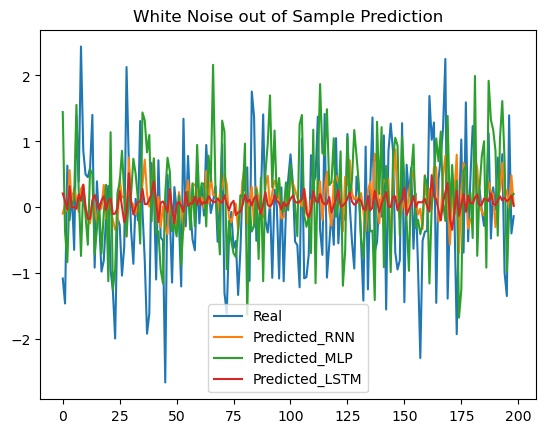

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [75]:
# Check different models for white noise

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(white_noise, input_window, 1, 0.8)

# Create MLP
MLP_2 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_2_Output_Predict = MLP_2.predict(test_series[0])

# Create RNN
RNN_2 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_2_Output_Predict = RNN_2.predict(test_series[0])

# Create LSTM
LSTM_2 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_2_Output_Predict = LSTM_2.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_2_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_2_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_2_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_2_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_2_Output_Predict, test_series[1]))

plt.figure()
plt.savefig('plots/WhiteNoise_InSample.png')
plt.title("White Noise In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_2_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_2_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_2_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1071.6016
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.0043 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9332  
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7352 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1846 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2329 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9193 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7470 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8136 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9070 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7226 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5708 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3203 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3258 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

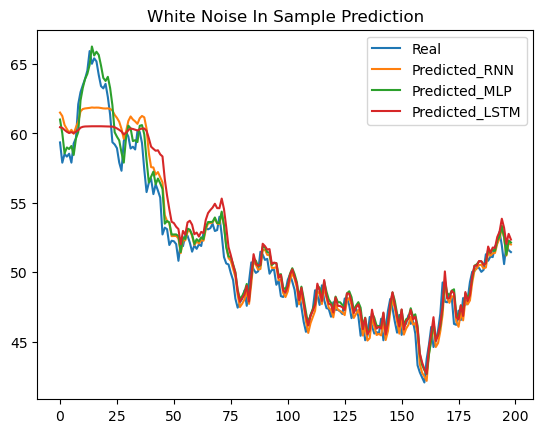

In [77]:
# Check different models for random_walk

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(random_walk, input_window, 1, 0.8)

# Create MLP
MLP_3 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_3_Output_Predict = MLP_3.predict(test_series[0])

# Create RNN
RNN_3 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_3_Output_Predict = RNN_3.predict(test_series[0])

# Create LSTM
LSTM_3 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_3_Output_Predict = LSTM_3.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_3_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_3_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_3_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_3_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_3_Output_Predict, test_series[1]))

plt.figure()
plt.savefig('plots/RandomWalk_InSample.png')
plt.title("Random Walk In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_3_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_3_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_3_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.show()


In [ ]:
# Check different models for arma(2,2)

input_window = 5
epochs = 100
# Split data as required
train_series, test_series = split_data(arma_series, input_window, 1, 0.8)

# Create MLP
MLP_4 = create_MLP(train_series[0], train_series[1], input_window, 15, epochs)

# Predict out of sample values
MLP_4_Output_Predict = MLP_4.predict(test_series[0])

# Create RNN
RNN_4 = create_RNN(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
RNN_4_Output_Predict = RNN_4.predict(test_series[0])

# Create LSTM
LSTM_4 = create_LSTM(train_series[0], train_series[1], input_window, 1, epochs)

# Predict out of sample values
LSTM_4_Output_Predict = LSTM_4.predict(test_series[0])

print("MLP")
print('R2 = ', r2_score(MLP_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(MLP_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(MLP_4_Output_Predict, test_series[1]))

print("RNN")
print('R2 = ', r2_score(RNN_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(RNN_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(RNN_4_Output_Predict, test_series[1]))

print("LSTM")
print('R2 = ', r2_score(LSTM_4_Output_Predict, test_series[1]))
print('MAE = ', mean_absolute_error(LSTM_4_Output_Predict, test_series[1]))
print('MSE = ', mean_squared_error(LSTM_4_Output_Predict, test_series[1]))

plt.figure()
plt.savefig('plots/ArmaSeries_InSample.png')
plt.title("Arma Series In Sample Prediction")
plt.plot(test_series[1],label='Real')
plt.plot(RNN_4_Output_Predict, label='Predicted_RNN')
plt.plot(MLP_4_Output_Predict, label='Predicted_MLP')
plt.plot(LSTM_4_Output_Predict, label='Predicted_LSTM')
plt.legend()
plt.show()
